In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

def compare(ie,ie2):
    exact=[]
    appro=[]
    for node in bn.ids():
        # potentials as numpy array
        exact+=ie.posterior(node).tolist()
        appro+=ie2.posterior(node).tolist()

    plot(exact,appro,'ro')

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
bn=gum.loadBN(os.path.join("res","alarm.dsl"))
gnb.showBN(bn,size='8')

### First, an exact inference.

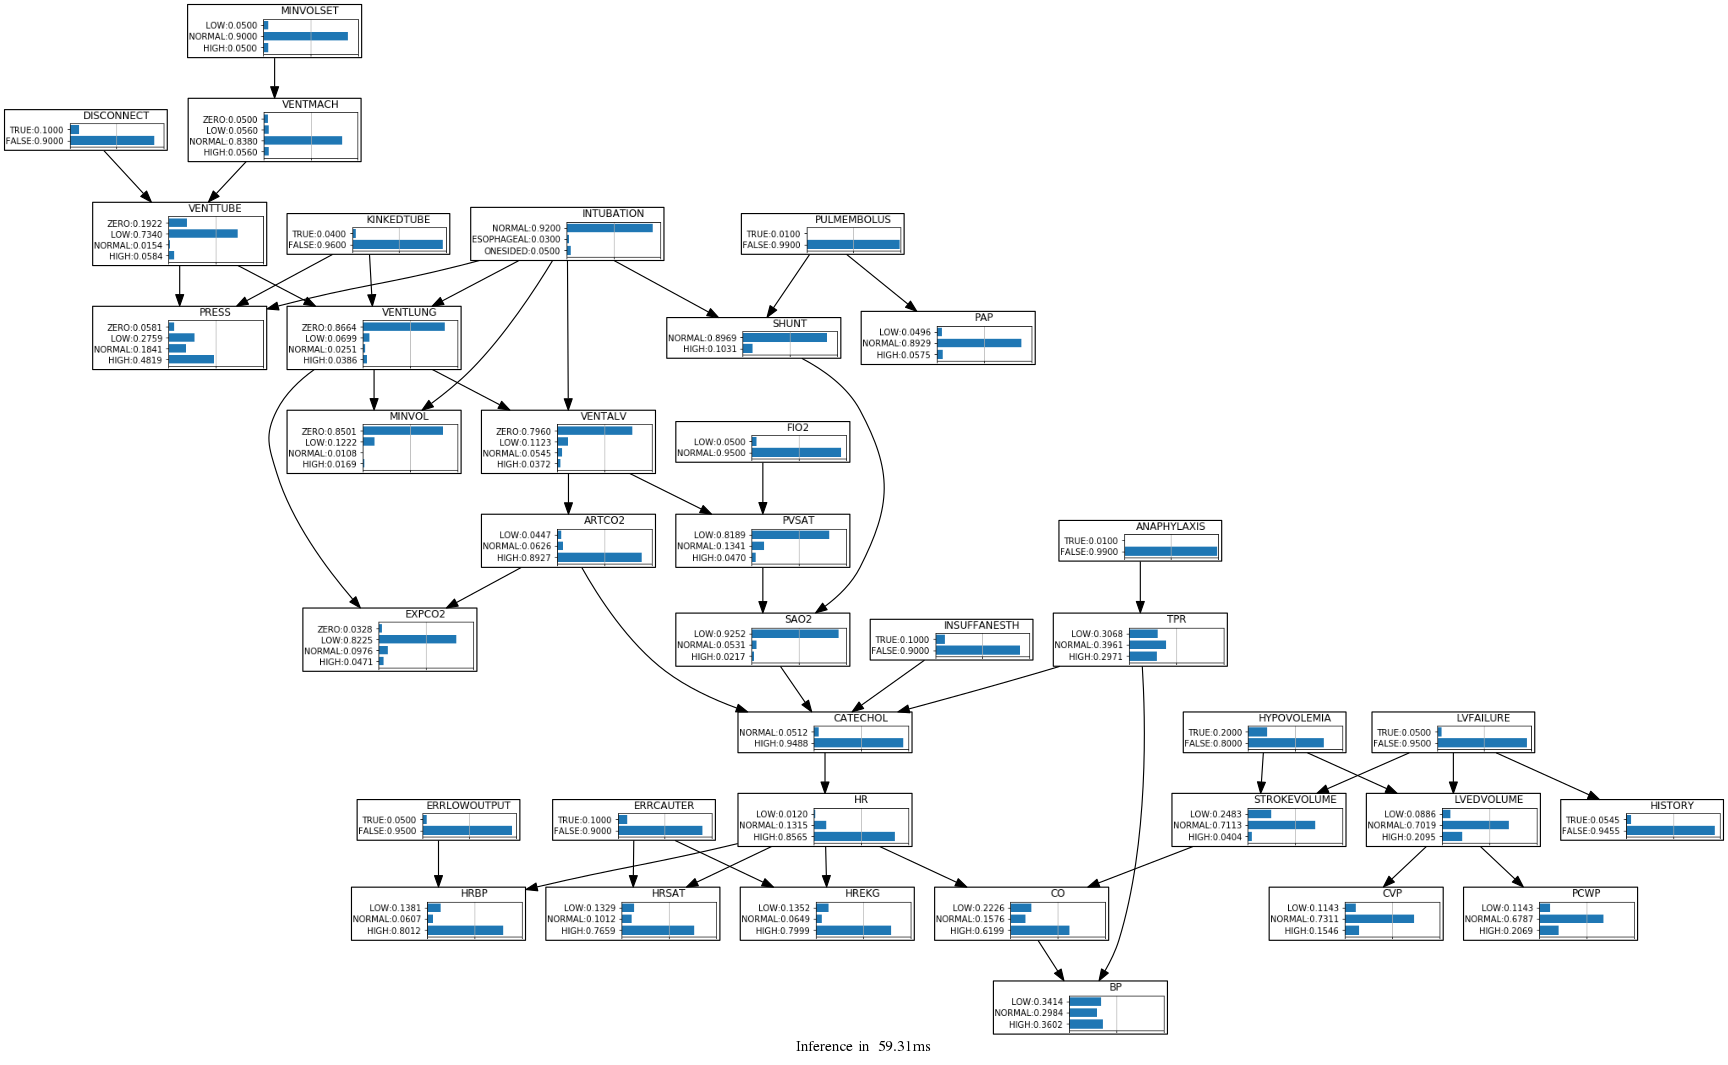

<INTUBATION:NORMAL> :: 0.92 /<INTUBATION:ESOPHAGEAL> :: 0.03 /<INTUBATION:ONESIDED> :: 0.05


In [3]:
gnb.showInference(bn,size="18") # using LazyPropagation by default

ie=gum.LazyPropagation(bn)
ie.makeInference()
print(ie.posterior(2))

<h3>Gibbs inference with default parameters</h3>

Gibbs inference iterations can be stopped 
<ul>
<li> by the value of error (epsilon)</li>
<li> by the rate of change of epsilon (MinEpsilonRate)</li>
<li> by the number of iteration (MaxIteration)</li>
<li> by the duration of the algorithm (MaxTime)</li>
</ul>

In [ ]:
ie2=gum.GibbsInference(bn)
gnb.showInference(bn,engine=ie2,size="18")

print(ie2.posterior(2))
print(ie2.messageApproximationScheme())
compare(ie,ie2)

With default parameters, this inference has been stopped by a low value of epsilon.

### Changing parameters

In [ ]:
ie2=gum.GibbsInference(bn)
ie2.setMaxIter(10000)
gnb.showInference(bn,engine=ie2,size="18")

print(ie2.posterior(2))
print(ie2.messageApproximationScheme())
compare(ie,ie2)

In [ ]:
ie2=gum.GibbsInference(bn)
ie2.setMaxTime(3)
gnb.showInference(bn,engine=ie2,size="15")

print(ie2.posterior(2))
print(ie2.messageApproximationScheme())
compare(ie,ie2)

### Looking at the convergence

In [ ]:
ie2=gum.GibbsInference(bn)

ie2.setEpsilon(1e-3)
gnb.animApproximationScheme(ie2)
gnb.showInference(bn,engine=ie2,size="15")

print(ie2.posterior(2))

In [ ]:
compare(ie,ie2)